In [22]:
import matplotlib.pyplot as plt
import numpy as np

# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


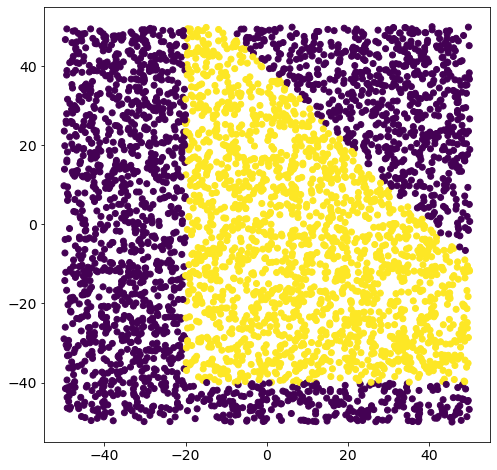

In [23]:
%run nonlinear_function.py

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [24]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

%run nonlinear_function.py

#training data 
perc_train=0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

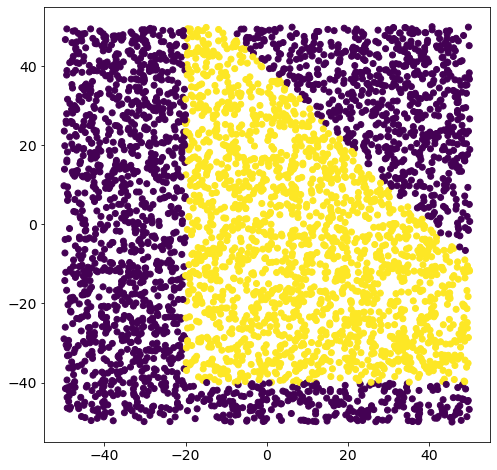

In [25]:
#keras work with numpy arrays: just use them from the start
TYPE=1
x= np.loadtxt(filename("data",TYPE), delimiter=' ')
y= np.loadtxt(filename("labels",TYPE), delimiter=' ')
N= len(x)

# dim. of a sample
L=len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])
    
N_train= int(perc_train*N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize =(8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [26]:
(x_train, y_train)=(x[0:N_train],y[0:N_train])
(x_valid, y_valid)=(x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [27]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())
    #return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)
print(x_train)

[[-1.09854886 -1.02696928]
 [ 0.23239757  0.32886942]
 [ 1.60836682  0.52872451]
 ...
 [-1.71033821 -0.58010476]
 [ 0.45209286 -0.58910521]
 [ 1.55988736  0.94632066]]


In [28]:
# reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=500
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2)                 6         
                                                                 
 dense_17 (Dense)            (None, 25)                75        
                                                                 
 dense_18 (Dense)            (None, 25)                650       
                                                                 
 dense_19 (Dense)            (None, 25)                650       
                                                                 
 dense_20 (Dense)            (None, 25)                650       
                                                                 
 dense_21 (Dense)            (None, 25)                650       
                                                                 
 dense_22 (Dense)            (None, 25)               

In [29]:
model.compile(loss='binary_crossentropy',
               optimizer="RMSprop",
               #optimizer='adam',
               metrics=['accuracy'])

In [30]:
fit = model.fit(x_train, y_train,
                epochs = nepoch, batch_size = 90,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/500
36/36 - 1s - loss: 0.5489 - accuracy: 0.7319 - val_loss: 0.4359 - val_accuracy: 0.8225 - 1s/epoch - 33ms/step
Epoch 2/500
36/36 - 0s - loss: 0.3995 - accuracy: 0.8578 - val_loss: 0.4005 - val_accuracy: 0.8600 - 107ms/epoch - 3ms/step
Epoch 3/500
36/36 - 0s - loss: 0.3579 - accuracy: 0.8784 - val_loss: 0.3434 - val_accuracy: 0.8775 - 104ms/epoch - 3ms/step
Epoch 4/500
36/36 - 0s - loss: 0.3132 - accuracy: 0.8784 - val_loss: 0.3075 - val_accuracy: 0.8675 - 103ms/epoch - 3ms/step
Epoch 5/500
36/36 - 0s - loss: 0.2741 - accuracy: 0.8772 - val_loss: 0.2628 - val_accuracy: 0.8712 - 100ms/epoch - 3ms/step
Epoch 6/500
36/36 - 0s - loss: 0.2513 - accuracy: 0.8838 - val_loss: 0.2254 - val_accuracy: 0.9000 - 104ms/epoch - 3ms/step
Epoch 7/500
36/36 - 0s - loss: 0.2329 - accuracy: 0.8972 - val_loss: 0.2284 - val_accuracy: 0.9038 - 106ms/epoch - 3ms/step
Epoch 8/500
36/36 - 0s - loss: 0.2126 - accuracy: 0.9009 - val_loss: 0.2067 - val_accuracy: 0.9125 - 105ms/epoch - 3ms/step
Epoch 9/50

Epoch 67/500
36/36 - 0s - loss: 0.0564 - accuracy: 0.9759 - val_loss: 0.0321 - val_accuracy: 0.9875 - 101ms/epoch - 3ms/step
Epoch 68/500
36/36 - 0s - loss: 0.0693 - accuracy: 0.9722 - val_loss: 0.0385 - val_accuracy: 0.9837 - 95ms/epoch - 3ms/step
Epoch 69/500
36/36 - 0s - loss: 0.0573 - accuracy: 0.9737 - val_loss: 0.0296 - val_accuracy: 0.9875 - 105ms/epoch - 3ms/step
Epoch 70/500
36/36 - 0s - loss: 0.0516 - accuracy: 0.9775 - val_loss: 0.1110 - val_accuracy: 0.9588 - 98ms/epoch - 3ms/step
Epoch 71/500
36/36 - 0s - loss: 0.0546 - accuracy: 0.9766 - val_loss: 0.0336 - val_accuracy: 0.9900 - 105ms/epoch - 3ms/step
Epoch 72/500
36/36 - 0s - loss: 0.0591 - accuracy: 0.9731 - val_loss: 0.0300 - val_accuracy: 0.9887 - 104ms/epoch - 3ms/step
Epoch 73/500
36/36 - 0s - loss: 0.0569 - accuracy: 0.9744 - val_loss: 0.0778 - val_accuracy: 0.9600 - 103ms/epoch - 3ms/step
Epoch 74/500
36/36 - 0s - loss: 0.0617 - accuracy: 0.9747 - val_loss: 0.0633 - val_accuracy: 0.9688 - 102ms/epoch - 3ms/step
Ep

Epoch 133/500
36/36 - 0s - loss: 0.0486 - accuracy: 0.9800 - val_loss: 0.0715 - val_accuracy: 0.9700 - 102ms/epoch - 3ms/step
Epoch 134/500
36/36 - 0s - loss: 0.0469 - accuracy: 0.9803 - val_loss: 0.0722 - val_accuracy: 0.9725 - 100ms/epoch - 3ms/step
Epoch 135/500
36/36 - 0s - loss: 0.0519 - accuracy: 0.9772 - val_loss: 0.0245 - val_accuracy: 0.9912 - 102ms/epoch - 3ms/step
Epoch 136/500
36/36 - 0s - loss: 0.0441 - accuracy: 0.9806 - val_loss: 0.0381 - val_accuracy: 0.9825 - 103ms/epoch - 3ms/step
Epoch 137/500
36/36 - 0s - loss: 0.0451 - accuracy: 0.9822 - val_loss: 0.0332 - val_accuracy: 0.9862 - 102ms/epoch - 3ms/step
Epoch 138/500
36/36 - 0s - loss: 0.0520 - accuracy: 0.9781 - val_loss: 0.0220 - val_accuracy: 0.9937 - 103ms/epoch - 3ms/step
Epoch 139/500
36/36 - 0s - loss: 0.0462 - accuracy: 0.9791 - val_loss: 0.0328 - val_accuracy: 0.9837 - 101ms/epoch - 3ms/step
Epoch 140/500
36/36 - 0s - loss: 0.0462 - accuracy: 0.9791 - val_loss: 0.0424 - val_accuracy: 0.9825 - 101ms/epoch - 3

36/36 - 0s - loss: 0.0386 - accuracy: 0.9850 - val_loss: 0.0312 - val_accuracy: 0.9875 - 104ms/epoch - 3ms/step
Epoch 199/500
36/36 - 0s - loss: 0.0396 - accuracy: 0.9837 - val_loss: 0.0626 - val_accuracy: 0.9737 - 106ms/epoch - 3ms/step
Epoch 200/500
36/36 - 0s - loss: 0.0446 - accuracy: 0.9812 - val_loss: 0.0404 - val_accuracy: 0.9837 - 100ms/epoch - 3ms/step
Epoch 201/500
36/36 - 0s - loss: 0.0445 - accuracy: 0.9825 - val_loss: 0.0287 - val_accuracy: 0.9900 - 104ms/epoch - 3ms/step
Epoch 202/500
36/36 - 0s - loss: 0.0382 - accuracy: 0.9834 - val_loss: 0.0306 - val_accuracy: 0.9850 - 103ms/epoch - 3ms/step
Epoch 203/500
36/36 - 0s - loss: 0.0406 - accuracy: 0.9825 - val_loss: 0.0407 - val_accuracy: 0.9775 - 98ms/epoch - 3ms/step
Epoch 204/500
36/36 - 0s - loss: 0.0391 - accuracy: 0.9828 - val_loss: 0.1067 - val_accuracy: 0.9588 - 104ms/epoch - 3ms/step
Epoch 205/500
36/36 - 0s - loss: 0.0500 - accuracy: 0.9772 - val_loss: 0.0333 - val_accuracy: 0.9862 - 102ms/epoch - 3ms/step
Epoch 2

Epoch 264/500
36/36 - 0s - loss: 0.0404 - accuracy: 0.9862 - val_loss: 0.0160 - val_accuracy: 0.9987 - 96ms/epoch - 3ms/step
Epoch 265/500
36/36 - 0s - loss: 0.0394 - accuracy: 0.9837 - val_loss: 0.0244 - val_accuracy: 0.9900 - 93ms/epoch - 3ms/step
Epoch 266/500
36/36 - 0s - loss: 0.0311 - accuracy: 0.9884 - val_loss: 0.0506 - val_accuracy: 0.9787 - 93ms/epoch - 3ms/step
Epoch 267/500
36/36 - 0s - loss: 0.0403 - accuracy: 0.9837 - val_loss: 0.0223 - val_accuracy: 0.9900 - 100ms/epoch - 3ms/step
Epoch 268/500
36/36 - 0s - loss: 0.0315 - accuracy: 0.9866 - val_loss: 0.0308 - val_accuracy: 0.9862 - 125ms/epoch - 3ms/step
Epoch 269/500
36/36 - 0s - loss: 0.0429 - accuracy: 0.9828 - val_loss: 0.0214 - val_accuracy: 0.9925 - 133ms/epoch - 4ms/step
Epoch 270/500
36/36 - 0s - loss: 0.0374 - accuracy: 0.9831 - val_loss: 0.0232 - val_accuracy: 0.9925 - 136ms/epoch - 4ms/step
Epoch 271/500
36/36 - 0s - loss: 0.0373 - accuracy: 0.9856 - val_loss: 0.0400 - val_accuracy: 0.9862 - 129ms/epoch - 4ms/

36/36 - 0s - loss: 0.0343 - accuracy: 0.9862 - val_loss: 0.0794 - val_accuracy: 0.9700 - 105ms/epoch - 3ms/step
Epoch 330/500
36/36 - 0s - loss: 0.0344 - accuracy: 0.9844 - val_loss: 0.0207 - val_accuracy: 0.9925 - 104ms/epoch - 3ms/step
Epoch 331/500
36/36 - 0s - loss: 0.0335 - accuracy: 0.9869 - val_loss: 0.0366 - val_accuracy: 0.9850 - 106ms/epoch - 3ms/step
Epoch 332/500
36/36 - 0s - loss: 0.0387 - accuracy: 0.9844 - val_loss: 0.0929 - val_accuracy: 0.9675 - 108ms/epoch - 3ms/step
Epoch 333/500
36/36 - 0s - loss: 0.0348 - accuracy: 0.9897 - val_loss: 0.0418 - val_accuracy: 0.9775 - 105ms/epoch - 3ms/step
Epoch 334/500
36/36 - 0s - loss: 0.0333 - accuracy: 0.9872 - val_loss: 0.0135 - val_accuracy: 0.9950 - 104ms/epoch - 3ms/step
Epoch 335/500
36/36 - 0s - loss: 0.0354 - accuracy: 0.9841 - val_loss: 0.0580 - val_accuracy: 0.9725 - 105ms/epoch - 3ms/step
Epoch 336/500
36/36 - 0s - loss: 0.0327 - accuracy: 0.9872 - val_loss: 0.1604 - val_accuracy: 0.9613 - 106ms/epoch - 3ms/step
Epoch 

Epoch 395/500
36/36 - 0s - loss: 0.0387 - accuracy: 0.9816 - val_loss: 0.0176 - val_accuracy: 0.9937 - 107ms/epoch - 3ms/step
Epoch 396/500
36/36 - 0s - loss: 0.0346 - accuracy: 0.9853 - val_loss: 0.0138 - val_accuracy: 0.9937 - 107ms/epoch - 3ms/step
Epoch 397/500
36/36 - 0s - loss: 0.0364 - accuracy: 0.9847 - val_loss: 0.0328 - val_accuracy: 0.9875 - 104ms/epoch - 3ms/step
Epoch 398/500
36/36 - 0s - loss: 0.0314 - accuracy: 0.9856 - val_loss: 0.0364 - val_accuracy: 0.9875 - 106ms/epoch - 3ms/step
Epoch 399/500
36/36 - 0s - loss: 0.0354 - accuracy: 0.9866 - val_loss: 0.0302 - val_accuracy: 0.9862 - 103ms/epoch - 3ms/step
Epoch 400/500
36/36 - 0s - loss: 0.0362 - accuracy: 0.9859 - val_loss: 0.0226 - val_accuracy: 0.9875 - 106ms/epoch - 3ms/step
Epoch 401/500
36/36 - 0s - loss: 0.0336 - accuracy: 0.9884 - val_loss: 0.0201 - val_accuracy: 0.9912 - 102ms/epoch - 3ms/step
Epoch 402/500
36/36 - 0s - loss: 0.0329 - accuracy: 0.9841 - val_loss: 0.0210 - val_accuracy: 0.9912 - 107ms/epoch - 3

36/36 - 0s - loss: 0.0345 - accuracy: 0.9847 - val_loss: 0.0276 - val_accuracy: 0.9925 - 111ms/epoch - 3ms/step
Epoch 461/500
36/36 - 0s - loss: 0.0380 - accuracy: 0.9828 - val_loss: 0.0370 - val_accuracy: 0.9837 - 105ms/epoch - 3ms/step
Epoch 462/500
36/36 - 0s - loss: 0.0292 - accuracy: 0.9881 - val_loss: 0.0272 - val_accuracy: 0.9900 - 100ms/epoch - 3ms/step
Epoch 463/500
36/36 - 0s - loss: 0.0323 - accuracy: 0.9869 - val_loss: 0.0458 - val_accuracy: 0.9837 - 107ms/epoch - 3ms/step
Epoch 464/500
36/36 - 0s - loss: 0.0314 - accuracy: 0.9859 - val_loss: 0.0520 - val_accuracy: 0.9775 - 105ms/epoch - 3ms/step
Epoch 465/500
36/36 - 0s - loss: 0.0319 - accuracy: 0.9866 - val_loss: 0.0345 - val_accuracy: 0.9862 - 107ms/epoch - 3ms/step
Epoch 466/500
36/36 - 0s - loss: 0.0332 - accuracy: 0.9850 - val_loss: 0.0322 - val_accuracy: 0.9850 - 99ms/epoch - 3ms/step
Epoch 467/500
36/36 - 0s - loss: 0.0335 - accuracy: 0.9859 - val_loss: 0.0250 - val_accuracy: 0.9900 - 106ms/epoch - 3ms/step
Epoch 4

[0.03351747617125511, 0.03005765751004219]


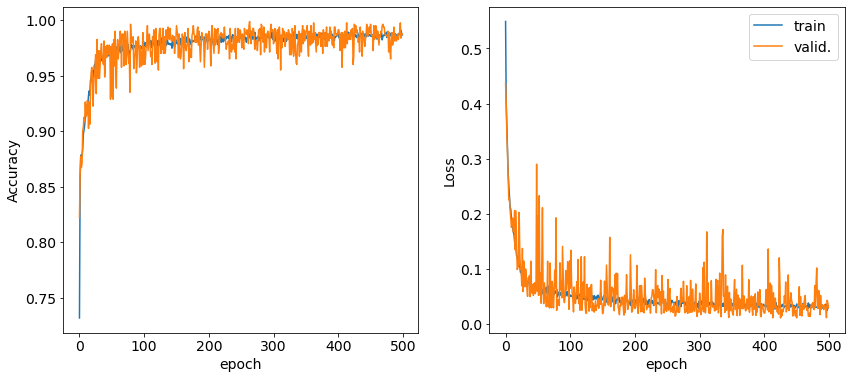

In [31]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
a=[]
a.append(fit.history['loss'][-1])
a.append(fit.history['val_loss'][-1])
print(a)
plt.savefig('LC_1F_2G.png')

In [32]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/(50/x_train[:,1].max())
print(grid_r)
pred = model.predict(grid_r)

51 2601
[50. 50.]
[[-1.73132788 -1.73132788]
 [-1.66207477 -1.73132788]
 [-1.59282165 -1.73132788]
 ...
 [ 1.59282165  1.73132788]
 [ 1.66207477  1.73132788]
 [ 1.73132788  1.73132788]]


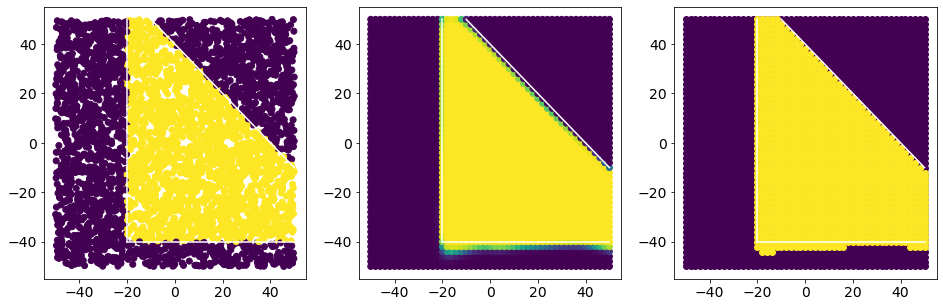

In [33]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show
plt.savefig('1F_2G.png')